# Generate simulated data for Excel report

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline
np.random.seed(42)

In [2]:
lot_ids = np.arange(0, 1001, 1)

In [3]:
sales_ids = np.arange(0, 201, 1)

In [4]:
base_date = np.datetime64('2018-01-02').astype('datetime64[s]').astype(int)
random_dates = base_date + (np.random.uniform(0, 180, size=10000)*24*3600).astype(int)
random_dates = random_dates.astype('datetime64[s]')

In [5]:
random_dates.sort()

In [6]:
random_dates

array(['2018-01-02T00:03:00', '2018-01-02T00:07:57', '2018-01-02T00:13:41',
       ..., '2018-06-30T21:51:44', '2018-06-30T22:05:21',
       '2018-06-30T22:46:49'], dtype='datetime64[s]')

In [7]:
sales_ids = np.arange(1, len(random_dates) + 1, 1)

In [8]:
remakes = np.random.poisson(lam=1, size=len(random_dates)//2) + 1

In [9]:
remakes = np.append(remakes, np.random.poisson(lam=0.75, size=len(random_dates)//2) + 1)

In [10]:
lead_times = np.random.standard_normal(len(random_dates))*3600 + 5*3600

In [11]:
(lead_times < 0).sum()

0

In [12]:
lead_times = random_dates + lead_times.astype(int)

In [13]:
manufacturing_time = ((np.random.standard_normal(len(random_dates)) * 3600 * 10 + 72 * 3600) * (remakes * 0.67)).astype(int)

In [14]:
manufacturing_time = lead_times + manufacturing_time

In [15]:
shipping_time = (np.random.standard_normal(len(random_dates)) * 3600 + 6 * 3600).astype(int)

In [16]:
shipping_time = shipping_time + manufacturing_time

In [17]:
shipping_time[:5]

array(['2018-01-05T18:33:05', '2018-01-04T07:48:33', '2018-01-05T23:37:28',
       '2018-01-06T00:56:52', '2018-01-07T20:30:23'], dtype='datetime64[s]')

In [18]:
pass_rate = 1 / remakes

(array([  146.,   507.,  1559.,     0.,  3616.,     0.,     0.,     0.,
            0.,  4172.]),
 array([ 0.14285714,  0.22857143,  0.31428571,  0.4       ,  0.48571429,
         0.57142857,  0.65714286,  0.74285714,  0.82857143,  0.91428571,  1.        ]),
 <a list of 10 Patch objects>)

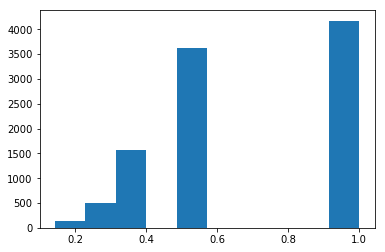

In [19]:
plt.hist(pass_rate)

In [20]:
data = OrderedDict([
    ('sales_order_id', sales_ids),
    ('sales_order_datetime', random_dates),
    ('manufacturing_start_datetime', lead_times),
    ('manufacturing_completed_datetime', manufacturing_time),
    ('shipped_datetime', shipping_time),
    ('remakes', remakes),
    ('pass_rate', pass_rate)
])
df = pd.DataFrame(data)

In [22]:
df.head()

,sales_order_id,sales_order_datetime,manufacturing_start_datetime,manufacturing_completed_datetime,shipped_datetime,remakes,pass_rate
0,1,2018-01-02 00:03:00,2018-01-02 04:03:13,2018-01-05 11:55:55,2018-01-05 18:33:05,2,0.50
1,2,2018-01-02 00:07:57,2018-01-02 05:23:50,2018-01-04 01:12:23,2018-01-04 07:48:33,1,1.00
2,3,2018-01-02 00:13:41,2018-01-02 05:55:26,2018-01-05 18:23:12,2018-01-05 23:37:28,2,0.50
3,4,2018-01-02 00:34:54,2018-01-02 07:07:35,2018-01-05 19:54:56,2018-01-06 00:56:52,2,0.50
4,5,2018-01-02 00:58:50,2018-01-02 07:55:42,2018-01-07 14:50:45,2018-01-07 20:30:23,4,0.25


In [23]:
df.tail()

,sales_order_id,sales_order_datetime,manufacturing_start_datetime,manufacturing_completed_datetime,shipped_datetime,remakes,pass_rate
9995,9996,2018-06-30 21:28:02,2018-07-01 02:51:25,2018-07-02 20:41:56,2018-07-03 02:48:24,1,1.0
9996,9997,2018-06-30 21:40:12,2018-07-01 00:51:33,2018-07-03 04:01:33,2018-07-03 08:31:06,1,1.0
9997,9998,2018-06-30 21:51:44,2018-07-01 04:25:57,2018-07-05 05:10:50,2018-07-05 12:00:57,2,0.5
9998,9999,2018-06-30 22:05:21,2018-07-01 02:00:07,2018-07-03 15:38:11,2018-07-03 21:41:56,1,1.0
9999,10000,2018-06-30 22:46:49,2018-07-01 02:49:09,2018-07-08 11:38:38,2018-07-08 17:31:10,5,0.2


In [24]:
df.to_csv('manufacturing_data.csv', index=False)